# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Sidney Paola Aguirre Castro
#### Segundo Integrante: John Alexander Galeano Ospina

In [10]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [12]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [13]:
!pip install somoclu

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [15]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);


n_rows, n_columns = 100, 120
som = somoclu.Somoclu(n_columns, n_rows,maptype="toroid", compactsupport=False)
som.train(Xn,epochs=100)

Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

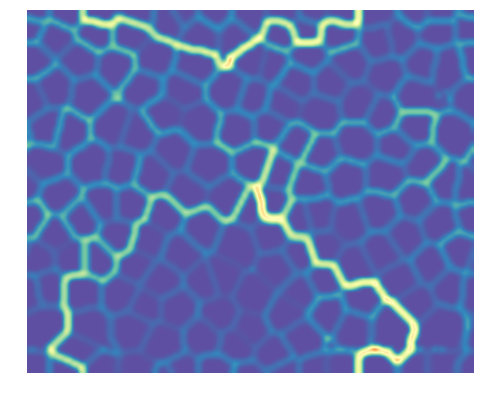

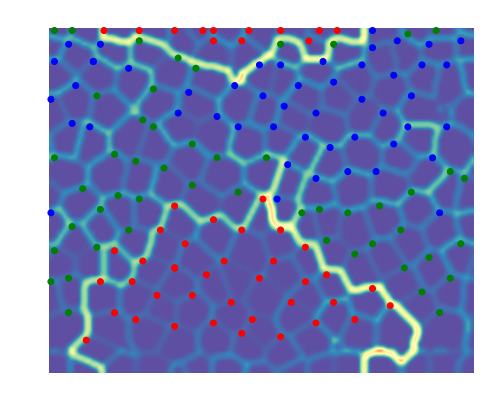

<module 'matplotlib.pyplot' from 'C:\\Users\\johng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?
R:La matriz U (Unified distance matrix) de un SOM es una matriz que representa o muestra las relaciones entre las neuronas vecinas o cercanas de un mapa auto-organizable.  El mapa es coloreado por los valores en la matriz U; así, en las partes oscuras del mapa se indica que las neuronas son lejanas, osea que la distancia euclidiana de los vectores codebook es mayor, mientras que los colores claros indican que las neuronas son cercanas, y que la distancia euclidiana entre los vectores sea menor, por lo tanto son cercanos en el espacio de entrada.
Esto hace que sea posible visualizar en dos dimensiones un espacio multidimensional.


1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1
R:La matriz U que se puede visualizar en las gráficas anteriores, muestran que el agrupamiento se da de acuerdo a las neuronas cuya distancia euclidiana entre los vectores de entrada es menor y por lo tanto son vecinas. 

Ejecute la siguiente instrucción:

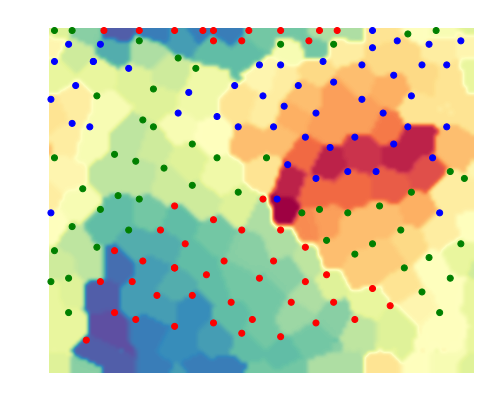

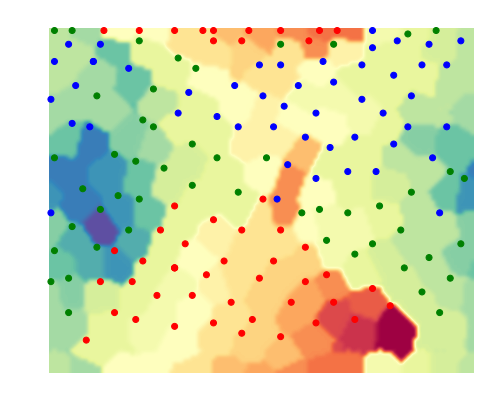

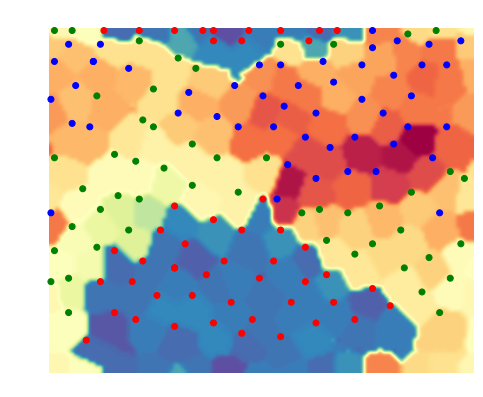

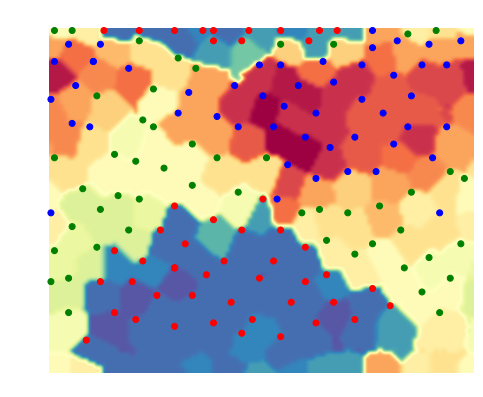

<module 'matplotlib.pyplot' from 'C:\\Users\\johng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
som.view_component_planes(bestmatches=True,bestmatchcolors=colors)

Responda:

1.3 ¿Qué se está gráficando en las figuras?
Se está graficando la distribución relativa de los componentes de los datos de entrada; es decir, esto permite visualizar cómo se relacionan las características del modelo en la entrada.



1.4 ¿Qué utilidad tienen las gráficas anteriores?
R: Las anteriores gráficas nos sirven para ver cómo se ajustaron los pesos en el entrenamiento de la red para cada característica. Lo que vemos es el resultado del entrenamiento con los pesos y su distribución, de acuerdo a la característica tomada de las flores en la BD Iris para cada iteración.


1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?
R: Vemos que la tercera con la cuarta variable están correlacionadas en el problema, ya que la representación permite visualizar una similitud entre la tercera y la cuarta gráfica. 

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [20]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

n_rows, n_columns = 150, 150
som = somoclu.Somoclu(n_columns, n_rows,maptype="toroid", compactsupport=False)
som.train(Xn,epochs=100)

Una vez entrenado el SOM, ejecute la siguiente celda

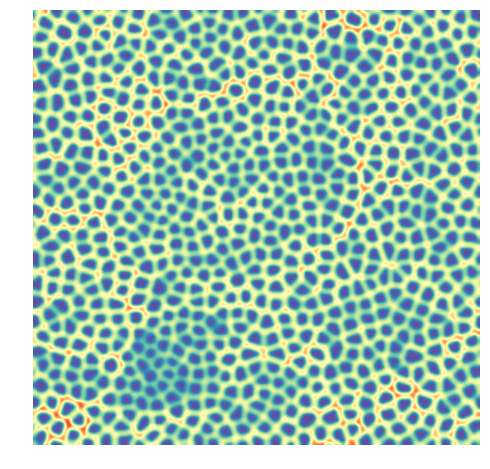

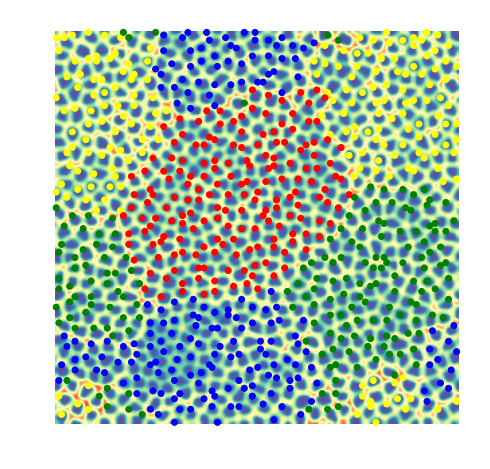

<module 'matplotlib.pyplot' from 'C:\\Users\\johng\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

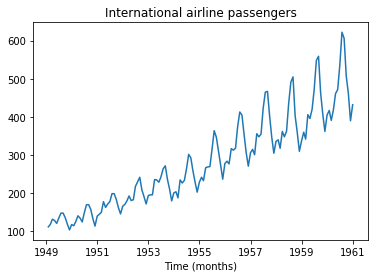

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('DB/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [23]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [7]:
!pip install neurolab

  Running setup.py bdist_wheel for neurolab: started
  Running setup.py bdist_wheel for neurolab: finished with status 'done'
  Stored in directory: C:\Users\johng\AppData\Local\pip\Cache\wheels\c6\8f\37\32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=6>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\johng\Anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [114]:
import neurolab as nl
import time
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# reshape into X=t-look_back+1:t and Y=t+1
look_back = 4 
# Retardos de tiempo por muestra
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


#Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
layers = []
for i in range(look_back):
    layers.append([0, 1])

ti = time.time()
# Crear la red e inicializar los pesos. 
neurons = 30
net = nl.net.newelm(layers,[neurons,1],[nl.trans.TanSig(), nl.trans.PureLin()])
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()

# Entrenar la red con los datos de entrenamiento
res = net.train(trainX, trainY.reshape(trainX.shape[0],1), epochs=1000, show=500, goal=0.00001)

# Evaluar la red con los datos de test
output = net.sim(testX)

#print(output.shape)
#print(testY.shape)
# Calculo de error
Error = MAPE(output,testY)

print('MAPE = ' + str(np.mean(Error)))

Epoch: 500; Error: 0.001769919888818387;
Epoch: 1000; Error: 0.001976724872192142;
The maximum number of train epochs is reached
MAPE = 0.12787069141163565


3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

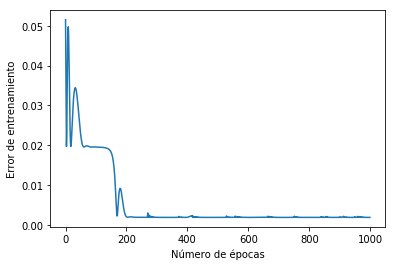

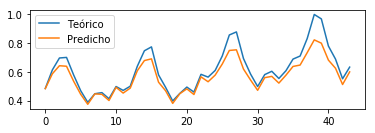

Costo computacional:  132.13871669769287  s


In [78]:
# Gráfica
plt.plot(res)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.show()

plt.subplot(212)
plt.plot(test.reshape(44))
plt.plot(output.reshape(44))
plt.legend(['Teórico', 'Predicho'])
plt.show()

print('Costo computacional: ', time.time()-ti, ' s')

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [26]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = ""
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [116]:
qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa        
1                              5                  0.1247
                               10                 0.1238
                               15                 0.1249
                               20                 0.1263
                               25                 0.1259
                               30                 0.1261
2                              5                  0.1214
                               10                 0.1269
                               15                 0.1178
                               20                 0.1169
                               25                 0.1173
                               30                 0.1234
3                              5                  0.1210
                               10                 0.1209
                               15                 0.1140
                               20                 0.1129
                               25                 0.1144
                               30                 0.1167
4                              5                  0.1247
                               10                 0.1259
                               15                 0.1259
                               20                 0.1307
                               25                 0.1238
                               30                 0.1278

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?
R: La red con retardos de tiempo por muestra = 3 y Neuronas por capa = 20 tiene un MAPE:0.1129

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?
R: Se visualiza un declive en los resultados con un retardo de tiempo por muestra de 4, esto se presenta al tomar datos historicos de tiempos posteriores 

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.

(100, 1)
(44, 1)
Error=  0.09712981502188926


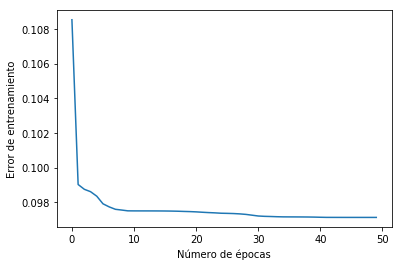

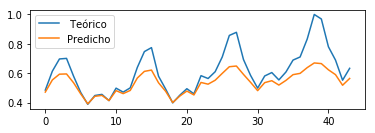

Costo computacional:  0.5888087749481201  s


In [82]:
ti = time.time()

# Create network with 2 layers
net = nl.net.newff([[-1, 1]] ,[1,1],transf=[nl.trans.TanSig(),nl.trans.PureLin()] )
# Train network
error = net.train(trainX, trainY.reshape(98,1), epochs = 1000, show =100)
# Simulate network
output = net.sim(test)

print('Error= ', error[-1])
plt.plot(error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.show()

plt.subplot(212)
plt.plot(test.reshape(44))
plt.plot(output.reshape(44))
plt.legend([' Teórico', 'Predicho'])
plt.show()

print('Costo computacional: ', time.time()-ti, ' s')
